In [1]:
import random
from PIL import Image, ImageDraw, ImageFont
import os
import cv2
import numpy as np
from skimage import exposure 
import shutil 
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### GENERATE COMPUTER DATA

In [15]:

def get_all_font_files(folder_path):
    return [f for f in os.listdir(folder_path) if f.lower().endswith(('.ttf', '.otf'))]

def get_words_from_list():
    return [
        "Lorem", "ipsum", "dolor", "sit", "amet", "consectetur", "adipiscing", "elit", "sed", "do", "eiusmod", "tempor", "incididunt",
        "ut", "labore", "et", "dolore", "magna", "aliqua", "ut", "enim", "ad", "minim", "veniam", "quis", "nostrud", "exercitation", "ullamco",
        "laboris", "nisi", "ut", "aliquip", "ex", "ea", "commodo", "consequat", "duis", "aute", "irure", "dolor", "in", "reprehenderit", "in",
        "voluptate", "velit", "esse", "cillum", "dolore", "eu", "fugiat", "nulla", "pariatur", "excepteur", "sint", "occaecat", "cupidatat",
        "non", "proident", "sunt", "in", "culpa", "qui", "officia", "deserunt", "mollit", "anim", "id", "est", "laborum", "The", "quick",
        "brown", "fox", "jumps", "over", "the", "lazy", "dog.", "Pack", "my", "box", "with", "five", "dozen", "liquor", "jugs.", "Random",
        "text", "generator", "is", "a", "handy", "tool", "for", "generating", "lorem", "ipsum-like", "text", "or", "other", "random", "sequences.",
        "It", "can", "be", "used", "in", "design", "mockups,", "websites,", "and", "other", "projects", "to", "fill", "space", "and", "create",
        "a", "sense", "of", "how", "the", "final", "product", "will", "look.", "Python", "is", "a", "high-level", "programming", "language",
        "known", "for", "its", "readability", "and", "versatility.", "It", "is", "widely", "used", "in", "web", "development,", "data", "science,",
        "artificial", "intelligence,", "and", "more.", "In", "a", "galaxy", "far,", "far", "away,", "there", "is", "a", "planet", "inhabited",
        "by", "curious", "aliens", "who", "communicate", "through", "a", "complex", "system", "of", "colors", "and", "shapes.", "Chasing", "the",
        "sunset,", "the", "adventurer", "climbed", "the", "mountain,", "eager", "to", "discover", "what", "lay", "beyond", "the", "horizon.",
        "Coffee", "is", "the", "elixir", "of", "productivity", "for", "many,", "providing", "the", "energy", "needed", "to", "tackle", "the",
        "day's", "challenges.", "The", "melody", "of", "the", "piano", "echoed", "through", "the", "empty", "hall,", "creating", "an", "atmosphere",
        "of", "melancholy", "and", "nostalgia.", "In", "the", "world", "of", "possibilities,", "creativity", "knows", "no", "bounds.", "Imagination",
        "is", "the", "key", "to", "unlocking", "new", "and", "exciting", "ideas.", "A", "journey", "of", "a", "thousand", "miles", "begins", "with",
        "a", "single", "step.", "Life", "is", "a", "series", "of", "natural", "and", "spontaneous", "changes.", "Don't", "resist", "them;", "that",
        "only", "creates", "sorrow.", "Let", "reality", "be", "reality.", "Let", "things", "flow", "naturally", "forward", "in", "whatever", "way",
        "they", "like.", "The", "only", "limit", "to", "our", "realization", "of", "tomorrow", "will", "be", "our", "doubts", "of", "today.", "It",
        "does", "not", "matter", "how", "slowly", "you", "go", "as", "long", "as", "you", "do", "not", "stop.", "Success", "is", "not", "final,",
        "failure", "is", "not", "fatal:", "It", "is", "the", "courage", "to", "continue", "that", "counts.", "Your", "work", "is", "going", "to",
        "fill", "a", "large", "part", "of", "your", "life,", "and", "the", "only", "way", "to", "be", "truly", "satisfied", "is", "to", "do", "what",
        "you", "believe", "is", "great", "work.", "And", "the", "only", "way", "to", "do", "great", "work", "is", "to", "love", "what", "you", "do.",
        "If", "you", "haven't", "found", "it", "yet,", "keep", "looking.", "Don't", "settle.", "As", "with", "all", "matters", "of", "the", "heart,",
        "you'll", "know", "when", "you", "find", "it.", "The", "future", "belongs", "to", "those", "who", "believe", "in", "the", "beauty", "of",
        "their", "dreams.", "Don't", "watch", "the", "clock;", "do", "what", "it", "does.", "Keep", "going.", "You", "are", "never", "too", "old",
        "to", "set", "another", "goal", "or", "to", "dream", "a", "new", "dream.", "The", "only", "way", "to", "do", "great", "work", "is",
        # ... (add more words as needed)
    ]

# Get the path to the fonts folder
fonts_folder = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/FONTS"

# Get a list of all the font files in the folder
font_files = get_all_font_files(fonts_folder)

# Create the "comp_words" folder if it doesn't exist
output_folder = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/comp_words"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate 3000 images
for i in range(3000):
    # Select a random font from the fonts folder
    font_path = os.path.join(fonts_folder, random.choice(font_files))

    # Create a PIL ImageFont object with the selected font and random font size
    font = ImageFont.truetype(font_path, random.randint(16, 32))
    
    # Calculate the text dimensions for the selected word and font
    text = random.choice(get_words_from_list())
    text_width, text_height = font.getsize_multiline(text)
    
    # Adjust the image size based on the calculated text dimensions
    image_width = min(text_width + 10, 256)
    image_height = min(text_height + 10, 256)

    # Create a blank image with the adjusted dimensions
    image = Image.new("RGB", (image_width, image_height), (255, 255, 255))

    # Draw the selected text on the image
    draw = ImageDraw.Draw(image)
    draw.multiline_text((10, 10), text, font=font, fill=(0, 0, 0))

    # Save the image to the "comp_words" folder
    image_filename = os.path.join(output_folder, f"image_{i+1}.jpg")
    image.save(image_filename)


### PREPROCESS COMPUTER DATA

In [16]:

# Input and output folders
input_folder = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/comp_words"
output_folder = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/preprocessed_comp_words"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Loop through each image file
for file_name in image_files:
    # Read the image
    image_path = os.path.join(input_folder, file_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 1. Resize images to a consistent size
    target_size = (224, 224)  # Adjust the target size as needed
    resized_img = cv2.resize(img, target_size)

    # 2. Normalize pixel values (scale them to the range [0, 1])
    normalized_img = resized_img / 255.0

    # 3. Histogram Equalization
    equalized_img = exposure.equalize_hist(normalized_img)

    # 4. Standardization
    mean = np.mean(normalized_img)
    std = np.std(normalized_img)
    standardized_img = (normalized_img - mean) / std

    # 5. Rescaling to a Different Range
    rescaled_img = (normalized_img - 0.5) / 0.5

    # Choose the processed image based on your experimentation and requirements
    preprocessed_img = normalized_img  # Adjust as needed

    # Save the preprocessed image to the output folder
    output_path = os.path.join(output_folder, f"preprocessed_{file_name}")
    cv2.imwrite(output_path, (preprocessed_img * 255).astype(np.uint8))


### PREPROCESS HANDWRITTEN DATA

In [17]:


# Input and output folders
input_folder = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/hand_words"
output_folder = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/preprocessed_hand_words"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Loop through each image file
for file_name in image_files:
    # Read the image
    image_path = os.path.join(input_folder, file_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 1. Resize images to a consistent size
    target_size = (224, 224)  # Adjust the target size as needed
    resized_img = cv2.resize(img, target_size)

    # 2. Normalize pixel values (scale them to the range [0, 1])
    normalized_img = resized_img / 255.0

    # 3. Histogram Equalization
    equalized_img = exposure.equalize_hist(normalized_img)

    # 4. Standardization
    mean = np.mean(normalized_img)
    std = np.std(normalized_img)
    standardized_img = (normalized_img - mean) / std

    # 5. Rescaling to a Different Range
    rescaled_img = (normalized_img - 0.5) / 0.5

    # Choose the processed image based on your experimentation and requirements
    preprocessed_img = normalized_img  # Adjust as needed

    # Save the preprocessed image to the output folder
    output_path = os.path.join(output_folder, f"preprocessed_{file_name}")
    cv2.imwrite(output_path, (preprocessed_img * 255).astype(np.uint8))


C:\Users\Hp\AppData\Local\Temp\ipykernel_23696\3903914358.py:30: RuntimeWarning: invalid value encountered in true_divide
  standardized_img = (normalized_img - mean) / std


### SPLITING DATA

In [18]:


# Define the source directories for labeled data
data_dir = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/labeled_data"
preprocessed_hand_words = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/preprocessed_hand_words"
human_handwriting_dir = os.path.join(preprocessed_hand_words)
preprocessed_comp_words = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/preprocessed_comp_words"
computer_writing_dir = os.path.join(preprocessed_comp_words)

# Define the destination directories for the splits
base_dir = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/data_split"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

# Create destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List images in each class folder
human_handwriting_images = os.listdir(human_handwriting_dir)
computer_writing_images = os.listdir(computer_writing_dir)

# Shuffle the image lists to randomize the order
random.shuffle(human_handwriting_images)
random.shuffle(computer_writing_images)

# Define split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Calculate the number of images for each split for both classes
human_train_count = int(train_ratio * len(human_handwriting_images))
human_valid_count = int(valid_ratio * len(human_handwriting_images))
human_test_count = len(human_handwriting_images) - human_train_count - human_valid_count

comp_train_count = int(train_ratio * len(computer_writing_images))
comp_valid_count = int(valid_ratio * len(computer_writing_images))
comp_test_count = len(computer_writing_images) - comp_train_count - comp_valid_count

# Function to copy images to destination folder
def copy_images(source_folder, dest_folder, image_list):
    os.makedirs(dest_folder, exist_ok=True)
    for image_filename in image_list:
        source_path = os.path.join(source_folder, image_filename)
        dest_path = os.path.join(dest_folder, image_filename)
        shutil.copy(source_path, dest_path)

# Copy images to the respective split directories for both classes
copy_images(human_handwriting_dir, os.path.join(train_dir, "human_handwriting"), human_handwriting_images[:human_train_count])
copy_images(human_handwriting_dir, os.path.join(valid_dir, "human_handwriting"), human_handwriting_images[human_train_count:human_train_count + human_valid_count])
copy_images(human_handwriting_dir, os.path.join(test_dir, "human_handwriting"), human_handwriting_images[human_train_count + human_valid_count:])

copy_images(computer_writing_dir, os.path.join(train_dir, "computer_writing"), computer_writing_images[:comp_train_count])
copy_images(computer_writing_dir, os.path.join(valid_dir, "computer_writing"), computer_writing_images[comp_train_count:comp_train_count + comp_valid_count])
copy_images(computer_writing_dir, os.path.join(test_dir, "computer_writing"), computer_writing_images[comp_train_count + comp_valid_count:])


### MODEL BUILD

In [19]:

# Assuming your word images are grayscale and have shape (height, width, channels)
input_shape = (224,224, 3)  # Update your_height and your_width accordingly

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification
              metrics=['accuracy'])

# Display the model summary
model.summary()
'''

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Display the model summary
model.summary()'''


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

"\n\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\n# Define the CNN model\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(64, activation='relu'))\nmodel.add(layers.Dense(num_classes, activation='softmax'))\n\n# Compile the model\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\n\n# Display the model summary\nmodel.summary()"

### MODEL FITTING

In [20]:


# Define your data directories
train_dir = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/data_split/train"  # Path to training data
valid_dir = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/data_split/valid"  # Path to validation data
test_dir = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/data_split/test"   # Path to test data

# Define model hyperparameters
batch_size = 32
epochs = 5
image_size = (224, 224)
num_classes = 2  # Two classes: Human Handwriting and Computer Writing

# Create data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' for 2 classes
    shuffle=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' for 2 classes
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # 'binary' for 2 classes
    shuffle=False
)


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

print("Test Loss:", test_loss)

Found 4198 images belonging to 2 classes.
Found 899 images belonging to 2 classes.
Found 901 images belonging to 2 classes.
Epoch 1/5
131/131 [==============================] - 537s 4s/step - loss: 0.2835 - accuracy: 0.8869 - val_loss: 0.1755 - val_accuracy: 0.9275
Epoch 2/5
131/131 [==============================] - 565s 4s/step - loss: 0.0625 - accuracy: 0.9789 - val_loss: 0.0636 - val_accuracy: 0.9743
Epoch 3/5
131/131 [==============================] - 529s 4s/step - loss: 0.0625 - accuracy: 0.9777 - val_loss: 0.0251 - val_accuracy: 0.9922
Epoch 4/5
131/131 [==============================] - 554s 4s/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0412 - val_accuracy: 0.9922
Epoch 5/5
29/29 [==============================] - 34s 1s/step - loss: 0.0564 - accuracy: 0.9834
Test Accuracy: 0.9833518266677856
Test Loss: 0.056405387818813324


In [21]:
model = model.save('Word_Prediction.keras')

In [39]:
model = load_model('Word_Prediction.keras')

# Path to the single image
image_path = "D:/hp/Desktop/msc ds/sem3/New DL Project/DL Words/check/word4.jpg"

# Load and preprocess the image for prediction
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make prediction
predictions = model.predict(img_array)
print (predictions)

# Assuming binary classification, print the prediction result
if predictions[0][0] > 0.5:
    print("Predicted class: Human-generated")
else:
    print("Predicted class: Computer-generated")


1/1 [==============================] - 0s 331ms/step
[[3.91619e-05]]
Predicted class: Computer-generated


### Confusion Matrix

29/29 [==============================] - 30s 1s/step
Confusion Matrix:
[[436  14]
 [  1 450]]


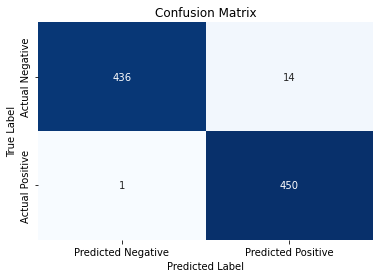


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       450
           1       0.97      1.00      0.98       451

    accuracy                           0.98       901
   macro avg       0.98      0.98      0.98       901
weighted avg       0.98      0.98      0.98       901



In [40]:

# Load your trained model
  # Replace with the path to your saved model
model = load_model('Word_Prediction.keras')

# Load your test data
# Replace 'X_test' and 'y_true' with your actual test data and true labels
X_test = test_generator
y_true = test_generator.classes

# Predict on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))
